<a href="https://colab.research.google.com/github/alinef29/ProcessosEstocasticos/blob/main/projeto1_estocast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Questão 1 - Posição da Mosca

In [2]:
import numpy as np
import random as rm
import matplotlib.pyplot as plt

rm.seed(1.61803398875)

In [3]:
estados = ["fruta","inicio","aranha","cadeira","janela"]

u = [["11","12","13","14","15"],["21","22","23","24","25"],["31","32","33","34","35"],
     ["41","42","43","44","45"],["51","52","53","54","55"]]

# Matriz de probabilidades de transições:
matrizTransicoes = [[0,1/2,0,1/2,0],[1/2,0,1/2,0,0],[0,0,1,0,0],[1/3,0,1/3,0,1/3],[0,0,0,0,1]]

In [4]:
simulacoes = 2000
prob = []
janela = 0
aranha = 0
vetorFruta = []
vetorCadeira = []
for i in range(1,simulacoes):
    n=0
    fruta = 0
    cadeira = 0
    estadoAtual = "inicio"
    while (estadoAtual != "janela"):
                if estadoAtual == "inicio":
                    passo = np.random.choice(u[1],replace=True,p=matrizTransicoes[1])
                    if passo == "21":
                        estadoAtual = "fruta"
                        n = n+1
                        fruta = fruta + 1
                    else:
                        estadoAtual = "aranha"
                        n = n+1
                        aranha = aranha + 1
                        break
                elif estadoAtual == "fruta":
                    passo = np.random.choice(u[0],replace=True,p=matrizTransicoes[0])
                    if passo == "12":
                        estadoAtual = "inicio"
                        n = n+1
                    else:
                        estadoAtual = "cadeira"
                        n = n+1
                        cadeira = cadeira + 1
                elif estadoAtual == "cadeira":
                    passo = np.random.choice(u[3],replace=True,p=matrizTransicoes[3])
                    if passo == "41":
                        estadoAtual = "fruta"
                        n = n+1
                        fruta = fruta + 1
                    elif passo == "43":
                        estadoAtual = "aranha"
                        n = n+1
                        aranha = aranha + 1
                        break
                    else:
                        estadoAtual = "janela"
                        n = n+1
                        janela = janela + 1
                else:
                    aranha = aranha + 1
    prob.append(janela/i)
    vetorFruta.append(fruta)
    vetorCadeira.append(cadeira)

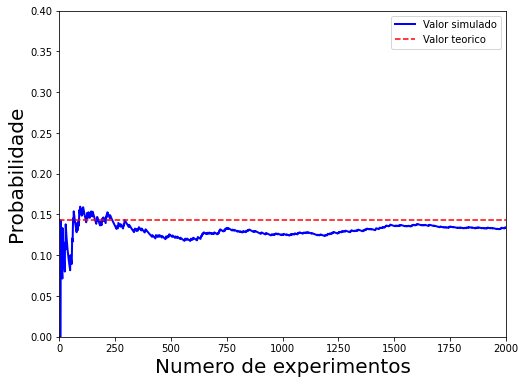

In [7]:
# item a

plt.figure(figsize=(8,6))
plt.plot(prob, linestyle='-', color="blue", linewidth=2,label = 'Valor simulado')
plt.axhline(y=1/7, color='r', linestyle='--', label = 'Valor teorico')
plt.ylabel("Probabilidade", fontsize=20)
plt.xlabel("Numero de experimentos", fontsize=20)
plt.xlim([0.0, simulacoes])
plt.ylim([0.0, 0.4])
plt.legend()
plt.show(True)

In [8]:
print("Probabilidade simulada da mosca escapar sem ser pega pela aranha (média):", round(sum(prob)/simulacoes, 3), "\nProbabilidade calculada: 0.143")

Probabilidade simulada da mosca escapar sem ser pega pela aranha (média): 0.13 
Probabilidade calculada: 0.143


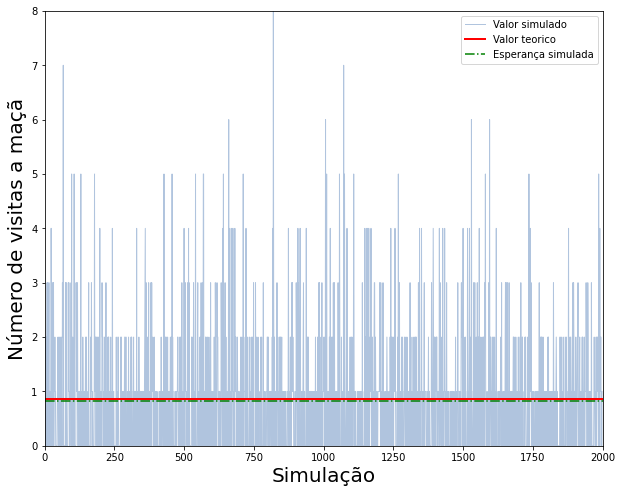

In [9]:
#item b

mediaFruta = sum(vetorFruta)/simulacoes
plt.figure(figsize=(10,8))
plt.plot(vetorFruta, linestyle='-', color="lightsteelblue", linewidth=1,label = 'Valor simulado')
plt.axhline(y=6/7, color='r', linestyle='-', linewidth=2, label = 'Valor teorico')
plt.axhline(mediaFruta, color='g', linestyle='-.', label = 'Esperança simulada')
plt.ylabel("Número de visitas a maçã", fontsize=20)
plt.xlabel("Simulação", fontsize=20)
plt.xlim([0.0, simulacoes])
plt.ylim([0.0, max(vetorFruta)])
plt.legend()
plt.show(True)

In [10]:
print("Número médio de visitas à maçã:", mediaFruta, "\nValor teórico: 0.857")

Número médio de visitas à maçã: 0.8325 
Valor teórico: 0.857


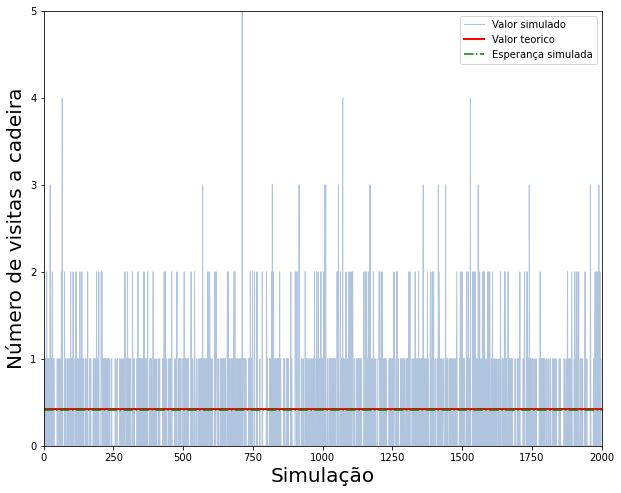

In [11]:
mediaCadeira = sum(vetorCadeira)/simulacoes
plt.figure(figsize=(10,8))
plt.plot(vetorCadeira, linestyle='-', color="lightsteelblue", linewidth=1,label = 'Valor simulado')
plt.axhline(y=3/7, color='r', linestyle='-', linewidth=2, label = 'Valor teorico')
plt.axhline(mediaCadeira, color='g', linestyle='-.', label = 'Esperança simulada')
plt.ylabel("Número de visitas a cadeira", fontsize=20)
plt.xlabel("Simulação", fontsize=20)
plt.xlim([0.0, simulacoes])
plt.ylim([0.0, max(vetorCadeira)])
plt.legend()
plt.show(True)

In [12]:
print("Número médio de visitas à cadeira:", mediaCadeira, "\nValor teórico: 0.428")

Número médio de visitas à cadeira: 0.408 
Valor teórico: 0.428


In [13]:
# item c

# Matriz de probabilidades de transições:
matrizTransicoesB = [[0,1/2,0,1/2,0],[1/2,0,1/2,0,0],[0,1/2,0,1/2,0],[1/3,0,1/3,0,1/3],[0,0,0,0,1]]

# Simulação
passos = []
for i in range(1,simulacoes):
    n=0
    estadoAtual = "inicio"
    while (estadoAtual != "janela"):
                if estadoAtual == "inicio":
                    passo = np.random.choice(u[1],replace=True,p=matrizTransicoesB[1])
                    if passo == "21":
                        estadoAtual = "fruta"
                        n = n+1
                    else:
                        estadoAtual = "aranha"
                        n = n+1
                elif estadoAtual == "fruta":
                    passo = np.random.choice(u[0],replace=True,p=matrizTransicoesB[0])
                    if passo == "12":
                        estadoAtual = "inicio"
                        n = n+1
                    else:
                        estadoAtual = "cadeira"
                        n = n+1
                elif estadoAtual == "cadeira":
                    passo = np.random.choice(u[3],replace=True,p=matrizTransicoesB[3])
                    if passo == "41":
                        estadoAtual = "fruta"
                        n = n+1
                    elif passo == "43":
                        estadoAtual = "aranha"
                        n = n+1
                    else:
                        estadoAtual = "janela"
                        n = n+1
                else:
                    passo = np.random.choice(u[2],replace=True,p=matrizTransicoesB[2])
                    if passo == "32":
                        estadoAtual = "inicio"
                        n = n+1
                    else:
                        estadoAtual = "cadeira"
                        n = n+1
    passos.append(n)

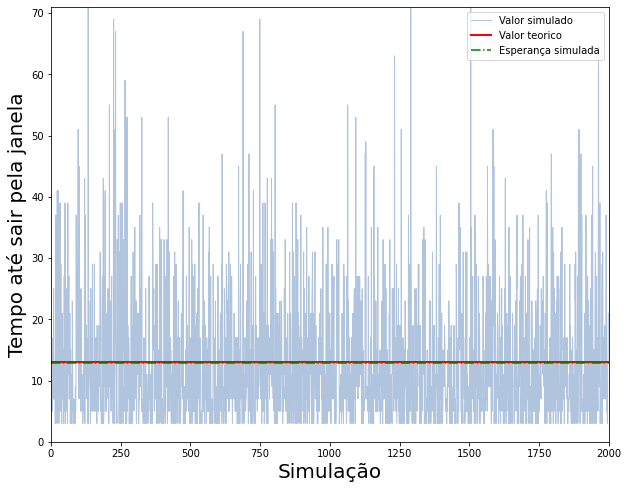

In [14]:
mediaPassos = sum(passos)/simulacoes
plt.figure(figsize=(10,8))
plt.plot(passos, linestyle='-', color="lightsteelblue", linewidth=1,label = 'Valor simulado')
plt.axhline(y=13, color='r', linestyle='-', linewidth=2, label = 'Valor teorico')
plt.axhline(mediaPassos, color='g', linestyle='-.', label = 'Esperança simulada')
plt.ylabel("Tempo até sair pela janela", fontsize=20)
plt.xlabel("Simulação", fontsize=20)
plt.xlim([0.0, simulacoes])
plt.ylim([0.0, max(passos)])
plt.legend()
plt.show(True)

In [15]:
print("média de tempo até a mosca sair pela janela:",sum(passos)/simulacoes,"\nValor teórico: 13")

média de tempo até a mosca sair pela janela: 12.9445 
Valor teórico: 13


Questão 2 - Problema: ruína do apostador

In [16]:
import numpy as np
import matplotlib.pyplot as plt

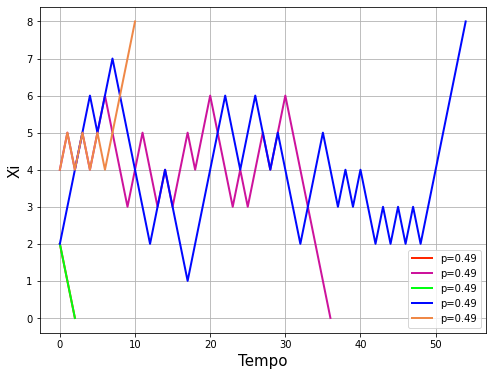

In [25]:
N = 8
vp = [0.49, 0.49, 0.49, 0.49, 0.49]
colors = ['#FF2700', '#CD139C', '#00FF11', '#0008FF', '#EF8847']
plt.figure(figsize=(8,6))
aux = 0
for p in vp:
    i = 3
    t = 0
    vt = []
    vi = []
    while((i > 0) and (i < N)):
        if(np.random.uniform() < p):
            i = i + 1
        else:
            i = i - 1
        
        vi.append(i)
        vt.append(t)
        t = t + 1
    plt.plot(vt, vi, linestyle='-', color=colors[aux], linewidth=2, label = 'p='+str(p))
    plt.xlabel("Tempo", fontsize=15)
    plt.ylabel("Xi", fontsize=15)
    aux = aux + 1
plt.legend()
plt.grid(True)
plt.show(True)

In [32]:
#letra b simular e comparar com o exercío teórico
import numpy as np
import matplotlib.pyplot as plt

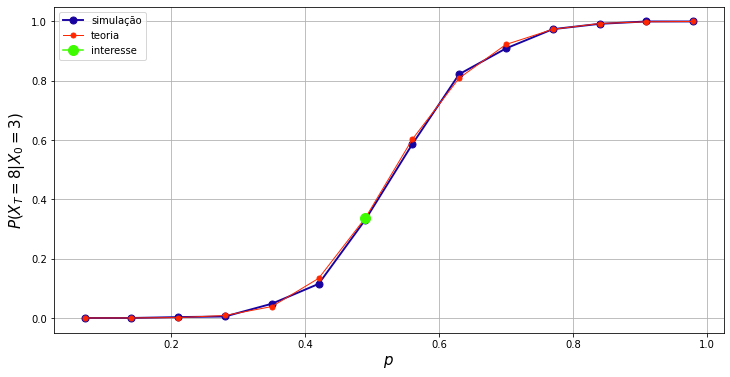

valor teórico: 0.338 valor simulado: 0.332  probabilidade =  0.49


In [33]:
N = 8
Ns = 1000
i0 = 3
vp = np.arange(0.07,1,0.07)
vd = []
for p in vp:
    nwins = 0
    for s in np.arange(0,Ns):
        i = i0
        while((i > 0) and (i < N)):
            if(np.random.uniform() < p):
                i = i + 1
            else:
                i = i - 1
        if(i == N):
            nwins = nwins + 1
    vd.append(nwins/Ns)

plt.figure(figsize=(12,6))

plt.plot(vp, vd, '-o', color='#1803A0', linewidth=1.9, markersize=7, markerfacecolor='#1803A0',label='simulação')

vR = []
i = i0
for p in vp:
    if(p != 1/2):
        pw = ((((1-p)/p)**i)-(((1-p)/p)**N))/(1-(((1-p)/p)**N))
    else:
        pw = (N-1)/N
    vR.append(1 - pw)
plt.plot(vp, vR, '-o', color='#FF2700', linewidth=1, markersize=5,markerfacecolor='#FF2700', label='teoria')
plt.plot(0.49, 0.338, '-o', color = '#3FFB01', markersize = 10, label = "interesse")
plt.xlabel("$p$", fontsize=15)
plt.ylabel(r'$P( X_T = 8 | X_0 = 3)$', fontsize=15)
plt.legend()
plt.grid(True)
plt.show(True)

print("valor teórico:", round(vR[6], 3),"valor simulado:", round(vd[6], 3)," probabilidade = ", 0.49)

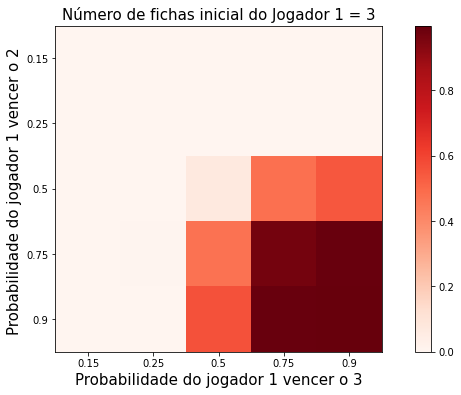

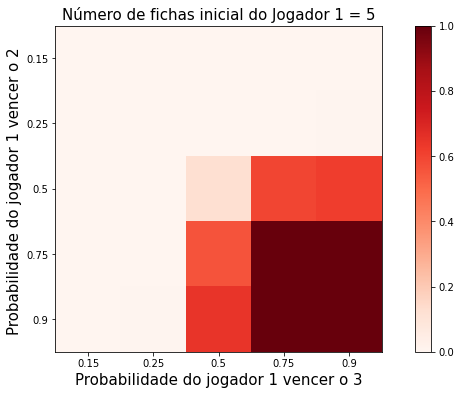

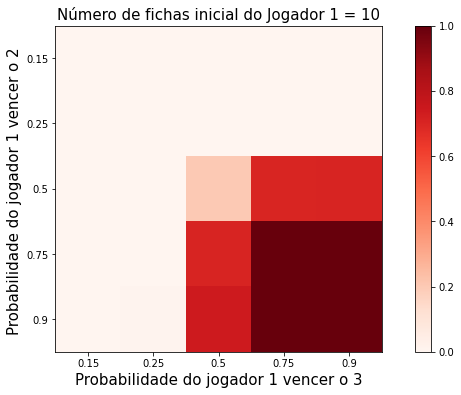

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
seed(1)
A = np.zeros((5, 5)) 

vp12 = [0.15, 0.25, 0.5, 0.75, 0.9]
vp13 = [0.15, 0.25, 0.5, 0.75, 0.9]

Ns = 1000

i01 = [3, 5, 10]
i2 = 5
i3 = 5

for i1 in i01:
    c = -1
    N = i1 + i2 + i3
    for p1 in vp12:
        c = c + 1
        l = -1
        for p2 in vp13:
            l = l + 1
            Nw = 0
            for s in np.arange(0, Ns):
                j1 = i1
                j2 = i2
                j3 = i3
                while ((j1 > 0) and (j1 < N)):
                    if ((np.random.uniform() < p1) and (j2 > 0) and (j1 > 0)):
                        j1 = j1 + 1
                        j2 = j2 - 1
                    elif (j1>0):
                        j1 = j1 - 1
                        j2 = j2 + 1
                    if ((np.random.uniform() < p2) and (j3 > 0) and (j1 > 0)):
                        j1 = j1 + 1
                        j3 = j3 - 1
                    elif (j1>0):
                        j1 = j1 - 1
                        j3 = j3 + 1
                if(j1 == N):
                    Nw += 1
            A[l][c] = Nw/Ns
    plt.figure(figsize=(12,6))        
    plt.xticks(ticks=np.arange(len(vp12)),labels=vp12)
    plt.yticks(ticks=np.arange(len(vp13)),labels=vp13)
    hm=plt.imshow(A, cmap='Reds',interpolation="nearest")
    plt.colorbar(hm)
    plt.xlabel("Probabilidade do jogador 1 vencer o 3", fontsize=15)
    plt.ylabel("Probabilidade do jogador 1 vencer o 2 ", fontsize=15)
    plt.title('Número de fichas inicial do Jogador 1 = '+str(i1), fontsize=15)
    plt.show(True)

Questão 3 - Lançamento das moedas

In [34]:
import random
from matplotlib import pyplot as plt

In [35]:
def get_thow(p):
    k = random.random()
    if k<=p:
        return 1
    else:
        return 0

In [36]:
## Variables definition

p=0.8                        #Probability of heads
n=1000                       #Number of Simulations
valor_teorico=(1+p)/(p**2)   #The teorical value

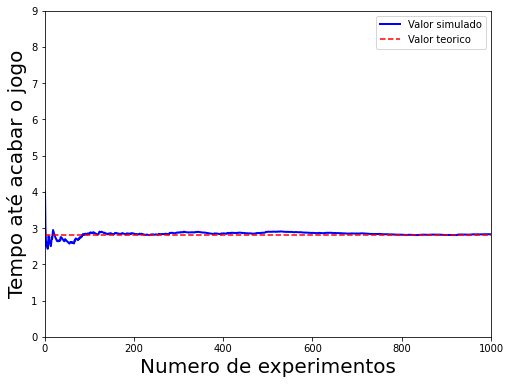

In [37]:
## Simlation

number_of_thows_vector=[]

for i in range(n):
    sequence=[get_thow(p),get_thow(p)]
    while sequence[-2:]!=[1,1]:
        sequence.append(get_thow(p))
    number_of_thows_vector.append(len(sequence))

mean_vector=[0]*n  #Vector with the evolution of the mean number of thow
index_vector=[0]*n #Vector with the number of the iteration

for index,num in enumerate(number_of_thows_vector):
    mean_vector[index]=sum(number_of_thows_vector[:index+1])/(index+1)
    index_vector[index]=index+1
    
plt.figure(figsize=(8,6))
plt.plot(index_vector, mean_vector, linestyle='-', color="blue", linewidth=2,label = 'Valor simulado')
plt.axhline(y=valor_teorico, color='r', linestyle='--', label = 'Valor teorico')
plt.ylabel("Tempo até acabar o jogo", fontsize=20)
plt.xlabel("Numero de experimentos", fontsize=20)
plt.xlim([0.0, n])
plt.ylim([0.0, max(mean_vector)+5])
plt.legend()
plt.show(True)

Questão 4 - 

In [38]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

rnd.seed(1)

In [39]:
pop = [1, 2, 3, 4, 5]

passos = 300
Ns = 1000

teo_value = passos * np.array([6/32, 3/32, 6/32, 5/32, 12/32])
N = np.arange(0, Ns)

p1 = [0, 1/2, 0, 1/6, 1/3]
p2 = [1, 0, 0, 0, 0]
p3 = [0, 0, 0, 0, 1]
p4 = [1/5, 0, 0, 0, 4/5]
p5 = [1/6, 0, 1/2, 1/3, 0]

ini = rnd.randint(1,5)

m1 = 0
m2 = 0
m3 = 0
m4 = 0
m5 = 0

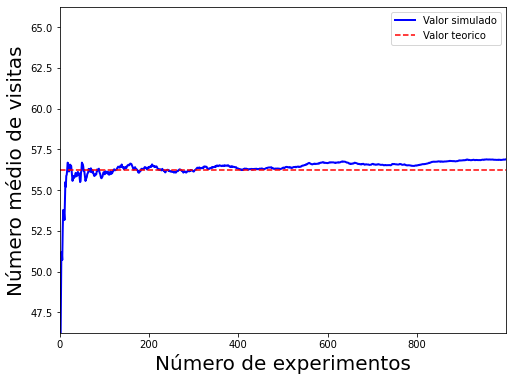

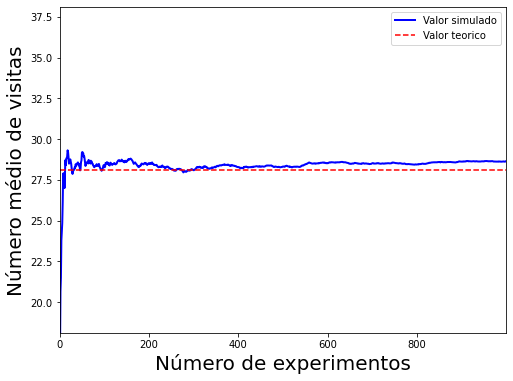

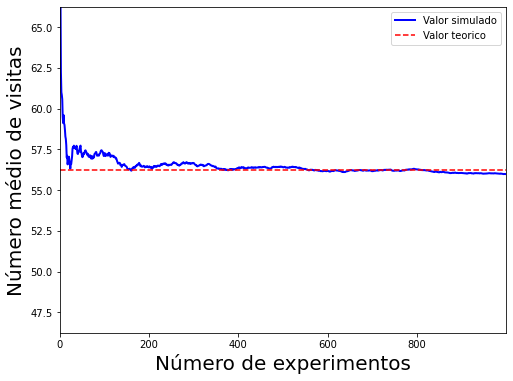

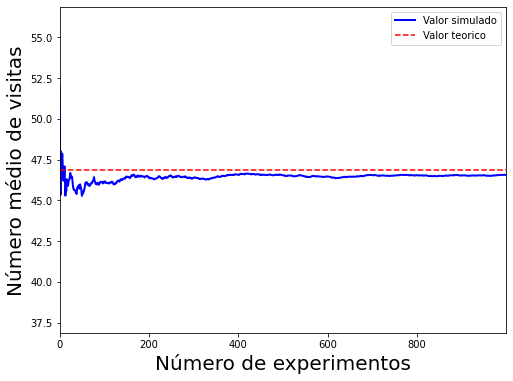

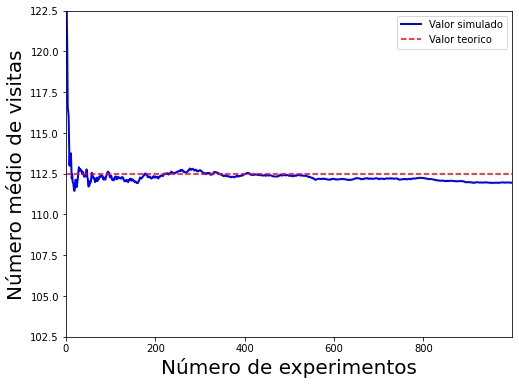

In [40]:
vm = [[], [], [], [], []]


for k in range(Ns):
    for _ in range(passos):
        
        if (ini == 1):
            m1 = m1 + 1
            ini = (rnd.choices(pop, weights = p1))[0]
        elif (ini == 2):
            m2 = m2 + 1
            ini = (rnd.choices(pop, weights = p2))[0]
        elif (ini == 3):
            m3 = m3 + 1
            ini = (rnd.choices(pop, weights = p3))[0]
        elif (ini == 4):
            m4 = m4 + 1
            ini = (rnd.choices(pop, weights = p4))[0]
        elif (ini == 5):
            m5 = m5 + 1
            ini = (rnd.choices(pop, weights = p5))[0]

    vm[0].append(m1/(k+1))
    vm[1].append(m2/(k+1))
    vm[2].append(m3/(k+1))
    vm[3].append(m4/(k+1))
    vm[4].append(m5/(k+1))


for j in range(5):
    plt.figure(figsize=(8,6))
    plt.plot(N, vm[j], linestyle='-', color="blue", linewidth=2,label = 'Valor simulado')
    plt.axhline(y=teo_value[j], color='r', linestyle='--', label = 'Valor teorico')
    plt.ylabel("Número médio de visitas", fontsize=20)
    plt.xlabel("Número de experimentos", fontsize=20)
    plt.xlim([0, N[-1]])
    plt.ylim(teo_value[j]-10 ,teo_value[j]+10)
    plt.legend()
    plt.show(True) 

Questão 5 - PageRank and Random Walk

In [41]:
# Imports cell

import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib

archive=open('hugo_graph.txt','r')
string_graph=archive.read()
archive.close()

FileNotFoundError: ignored

In [42]:
# Graph generation cell

graph = nx.DiGraph()
for n in range(77):
    graph.add_node(n)
for edge in string_graph.strip().split('\n'):
    e1,e2=edge.split(' ')
    graph.add_edge(int(e1),int(e2))

NameError: ignored

In [43]:
# Graph to matrix

A = nx.to_numpy_matrix(graph)
print(A)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [44]:
# Matrix de probabilidades

N = A.shape[0]
P = np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        if(np.sum(A[i,:]) > 0):
            P[i,j] = A[i,j]/np.sum(A[i,:])
        else:
            P[i,j] = 1/N
print(P)

[[0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]
 ...
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]]


In [45]:
# Matrix Google

G = np.zeros((N,N))
alpha = 0.85
for i in range(0,N):
    for j in range(0,N):
        G[i,j] = alpha*P[i,j] + (1-alpha)/N
print(G)

[[0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]
 ...
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]]


In [46]:
# Pagerank algorithm

eigvals, eigvecs = np.linalg.eig(G.T)
eigvec1 = eigvecs[:,np.isclose(eigvals, 1)]
eigvec1 = eigvec1[:,0]

stationary = eigvec1 / eigvec1.sum()

stationary = stationary.real
for i in range(0,N):
    print(i+1, ':', stationary[i])

1 : 0.012987012987013002
2 : 0.012987012987012986
3 : 0.012987012987012986
4 : 0.012987012987012986
5 : 0.012987012987012986
6 : 0.012987012987012986
7 : 0.012987012987012986
8 : 0.012987012987012986
9 : 0.012987012987012986
10 : 0.012987012987012986
11 : 0.012987012987012986
12 : 0.012987012987012986
13 : 0.012987012987012986
14 : 0.012987012987012986
15 : 0.012987012987012986
16 : 0.012987012987012986
17 : 0.012987012987012986
18 : 0.012987012987012986
19 : 0.012987012987012986
20 : 0.012987012987012986
21 : 0.012987012987012986
22 : 0.012987012987012986
23 : 0.012987012987012986
24 : 0.012987012987012986
25 : 0.012987012987012986
26 : 0.012987012987012986
27 : 0.012987012987012986
28 : 0.012987012987012986
29 : 0.012987012987012986
30 : 0.012987012987012986
31 : 0.012987012987012986
32 : 0.012987012987012986
33 : 0.012987012987012986
34 : 0.012987012987012986
35 : 0.012987012987012986
36 : 0.012987012987012986
37 : 0.012987012987012986
38 : 0.012987012987012986
39 : 0.01298701298701

In [47]:
# Random Walk

nodes=list(graph.nodes())
n_simulations=10000
step_in_simulation=500

visits={}
i=0

for n in range(n_simulations):
    start_node=random.choice(nodes)
    next_node = start_node
    for s in range(step_in_simulation):
        if next_node+1 in visits:
            visits[next_node+1]+=1
            i+=1
        else:
            visits[next_node+1]=1
            i+=1
            
        neighbours=graph.edges(next_node)
        if len(neighbours)==0:
            break
        next_node=random.choice(list(neighbours))[1]
        
for visit in visits:
    visits[visit]=visits[visit]/i
    
visits

{1: 0.0122,
 2: 0.0133,
 3: 0.0126,
 4: 0.0131,
 5: 0.0117,
 6: 0.0139,
 7: 0.0129,
 8: 0.012,
 9: 0.0131,
 10: 0.0142,
 11: 0.014,
 12: 0.0135,
 13: 0.0146,
 14: 0.0139,
 15: 0.0105,
 16: 0.0119,
 17: 0.0139,
 18: 0.0118,
 19: 0.0117,
 20: 0.0121,
 21: 0.0125,
 22: 0.011,
 23: 0.0128,
 24: 0.0149,
 25: 0.0132,
 26: 0.0147,
 27: 0.0154,
 28: 0.0115,
 29: 0.0136,
 30: 0.0125,
 31: 0.0148,
 32: 0.013,
 33: 0.0132,
 34: 0.0145,
 35: 0.0133,
 36: 0.0138,
 37: 0.0137,
 38: 0.0119,
 39: 0.0136,
 40: 0.014,
 41: 0.011,
 42: 0.0136,
 43: 0.0123,
 44: 0.0128,
 45: 0.0133,
 46: 0.0127,
 47: 0.011,
 48: 0.0108,
 49: 0.0134,
 50: 0.0134,
 51: 0.0118,
 52: 0.0111,
 53: 0.0138,
 54: 0.011,
 55: 0.0104,
 56: 0.0136,
 57: 0.0113,
 58: 0.0113,
 59: 0.0138,
 60: 0.0138,
 61: 0.0148,
 62: 0.0136,
 63: 0.0129,
 64: 0.0143,
 65: 0.0141,
 66: 0.0136,
 67: 0.0149,
 68: 0.013,
 69: 0.0131,
 70: 0.0124,
 71: 0.0146,
 72: 0.0143,
 73: 0.0131,
 74: 0.013,
 75: 0.0117,
 76: 0.0136,
 77: 0.012}

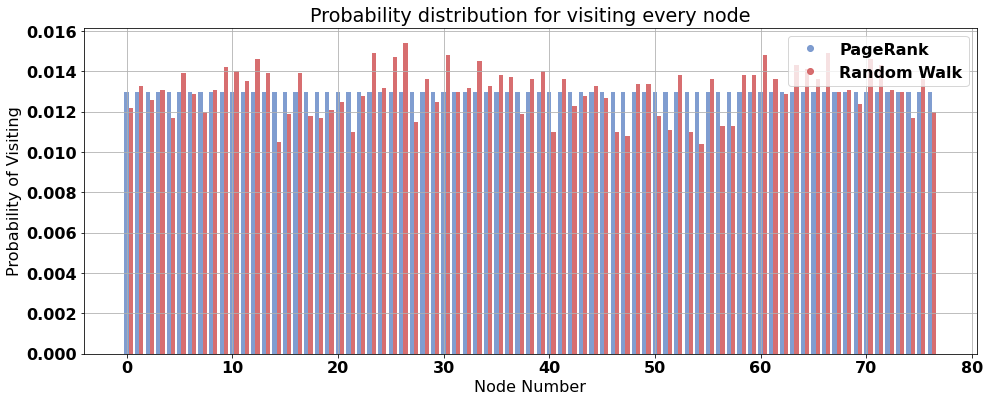

In [48]:
# Comparison

font = {'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

D_id_color={
    'PageRank':(114/255,147/255,203/255,0.9),
    'Random Walk':(211/255,94/255,96/255,0.9)
}

plt.figure(figsize=(16,6))
for i in range(0,N):
    plt.bar(i,stationary[i],width = 0.4,color=D_id_color['PageRank'])
    
for i in range(0,N):
    plt.bar(i+0.4,visits[i+1],width = 0.4,color=D_id_color['Random Walk'])
    
plt.grid()
plt.xlabel('Node Number')
plt.ylabel('Probability of Visiting')
plt.title('Probability distribution for visiting every node')

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in D_id_color.values()]
plt.legend(markers, D_id_color.keys(), numpoints=1)

plt.show()